# Section A

In [42]:
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv("NasdaqReturns.csv")
df.head()

,StockSymbol,Industry,SubIndustry,Ret2000.01,Ret2000.02,Ret2000.03,Ret2000.04,Ret2000.05,Ret2000.06,ret2000.07,...,Ret2009.03,Ret2009.04,Ret2009.05,Ret2009.06,Ret2009.07,Ret2009.08,Ret2009.09,Ret2009.10,Ret2009.11,Ret2009.12
0,AAON,Industrial Goods,General Building Materials,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,...,0.185088,0.100565,0.067762,-0.045062,-0.025832,0.060976,-0.039234,-0.101297,0.041804,0.019885
1,AAPL,Consumer Goods,Electronic Equipment,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,...,0.192919,0.208858,0.079571,0.043673,0.138606,0.018159,0.103339,0.016995,0.053267,0.041980
2,ABAX,Healthcare,Diagnostic Substances,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,...,0.111541,-0.119907,0.162126,0.161108,0.304581,0.001883,0.014026,-0.141783,-0.024740,0.134043
3,ABCB,Financial,Regional,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,...,-0.024845,0.402570,-0.039816,-0.020155,0.004651,0.007812,0.122449,-0.170423,0.105351,0.062315
4,ABFS,Services,Trucking,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,...,0.113583,0.227007,0.216357,-0.075114,0.069471,0.112273,-0.052831,-0.127703,-0.047582,0.191981


In [44]:
len(df)

1158

In [45]:
print("Companies in each industry")
df.groupby('Industry').size().sort_values(ascending=False)

Companies in each industry


Industry
Financial            338
Technology           296
Services             202
Healthcare           111
Consumer Goods        80
Industrial Goods      65
Basic Materials       50
Utilities             12
Conglomerates          2
Consumer Cyclical      2
dtype: int64

In [46]:
len(df[df['Ret2000.12'] >= 0.1])

309

In [47]:
len(df[df['Ret2000.12'] <= -0.1])

261

In [48]:
df.groupby('Industry')['Ret2008.10'].mean().sort_values(ascending=True)

Industry
Conglomerates       -0.265748
Basic Materials     -0.254674
Industrial Goods    -0.233366
Technology          -0.196299
Services            -0.173833
Healthcare          -0.169440
Consumer Goods      -0.155209
Consumer Cyclical   -0.145705
Utilities           -0.120087
Financial           -0.102884
Name: Ret2008.10, dtype: float64

# Insights

i) There are 1138 companies in the dataset. The number of companies in each industry is as follows:

```
Financial            338
Technology           296
Services             202
Healthcare           111
Consumer Goods        80
Industrial Goods      65
Basic Materials       50
Utilities             12
Conglomerates          2
Consumer Cyclical      2
```

ii)
*   309 stocks saw a 10% increase or more in Dec 2000.
*   261 stocks saw a 10% decrease or more in Dec 2000.

iii) In Oct 2008, Conglomerates saw the worst average return across all stocks with -26.57%. Basic materials and Industrial goods saw 2nd and 3rd worst average returns during the same period.




# Section B

In [49]:
df_cluster = df.iloc[:,3:]
df_cluster.head()

,Ret2000.01,Ret2000.02,Ret2000.03,Ret2000.04,Ret2000.05,Ret2000.06,ret2000.07,Ret2000.08,Ret2000.09,Ret2000.10,...,Ret2009.03,Ret2009.04,Ret2009.05,Ret2009.06,Ret2009.07,Ret2009.08,Ret2009.09,Ret2009.10,Ret2009.11,Ret2009.12
0,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,0.024676,-0.020408,-0.173318,...,0.185088,0.100565,0.067762,-0.045062,-0.025832,0.060976,-0.039234,-0.101297,0.041804,0.019885
1,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,0.211290,-0.580003,-0.267141,...,0.192919,0.208858,0.079571,0.043673,0.138606,0.018159,0.103339,0.016995,0.053267,0.041980
2,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,0.033392,0.000000,0.091696,...,0.111541,-0.119907,0.162126,0.161108,0.304581,0.001883,0.014026,-0.141783,-0.024740,0.134043
3,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,0.095290,0.056680,-0.096339,...,-0.024845,0.402570,-0.039816,-0.020155,0.004651,0.007812,0.122449,-0.170423,0.105351,0.062315
4,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,0.056842,0.033602,0.036269,...,0.113583,0.227007,0.216357,-0.075114,0.069471,0.112273,-0.052831,-0.127703,-0.047582,0.191981


In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [51]:
D = linkage(df_cluster, method='ward', metric='euclidean')

Text(0.5, 1.0, 'Dendrogram')

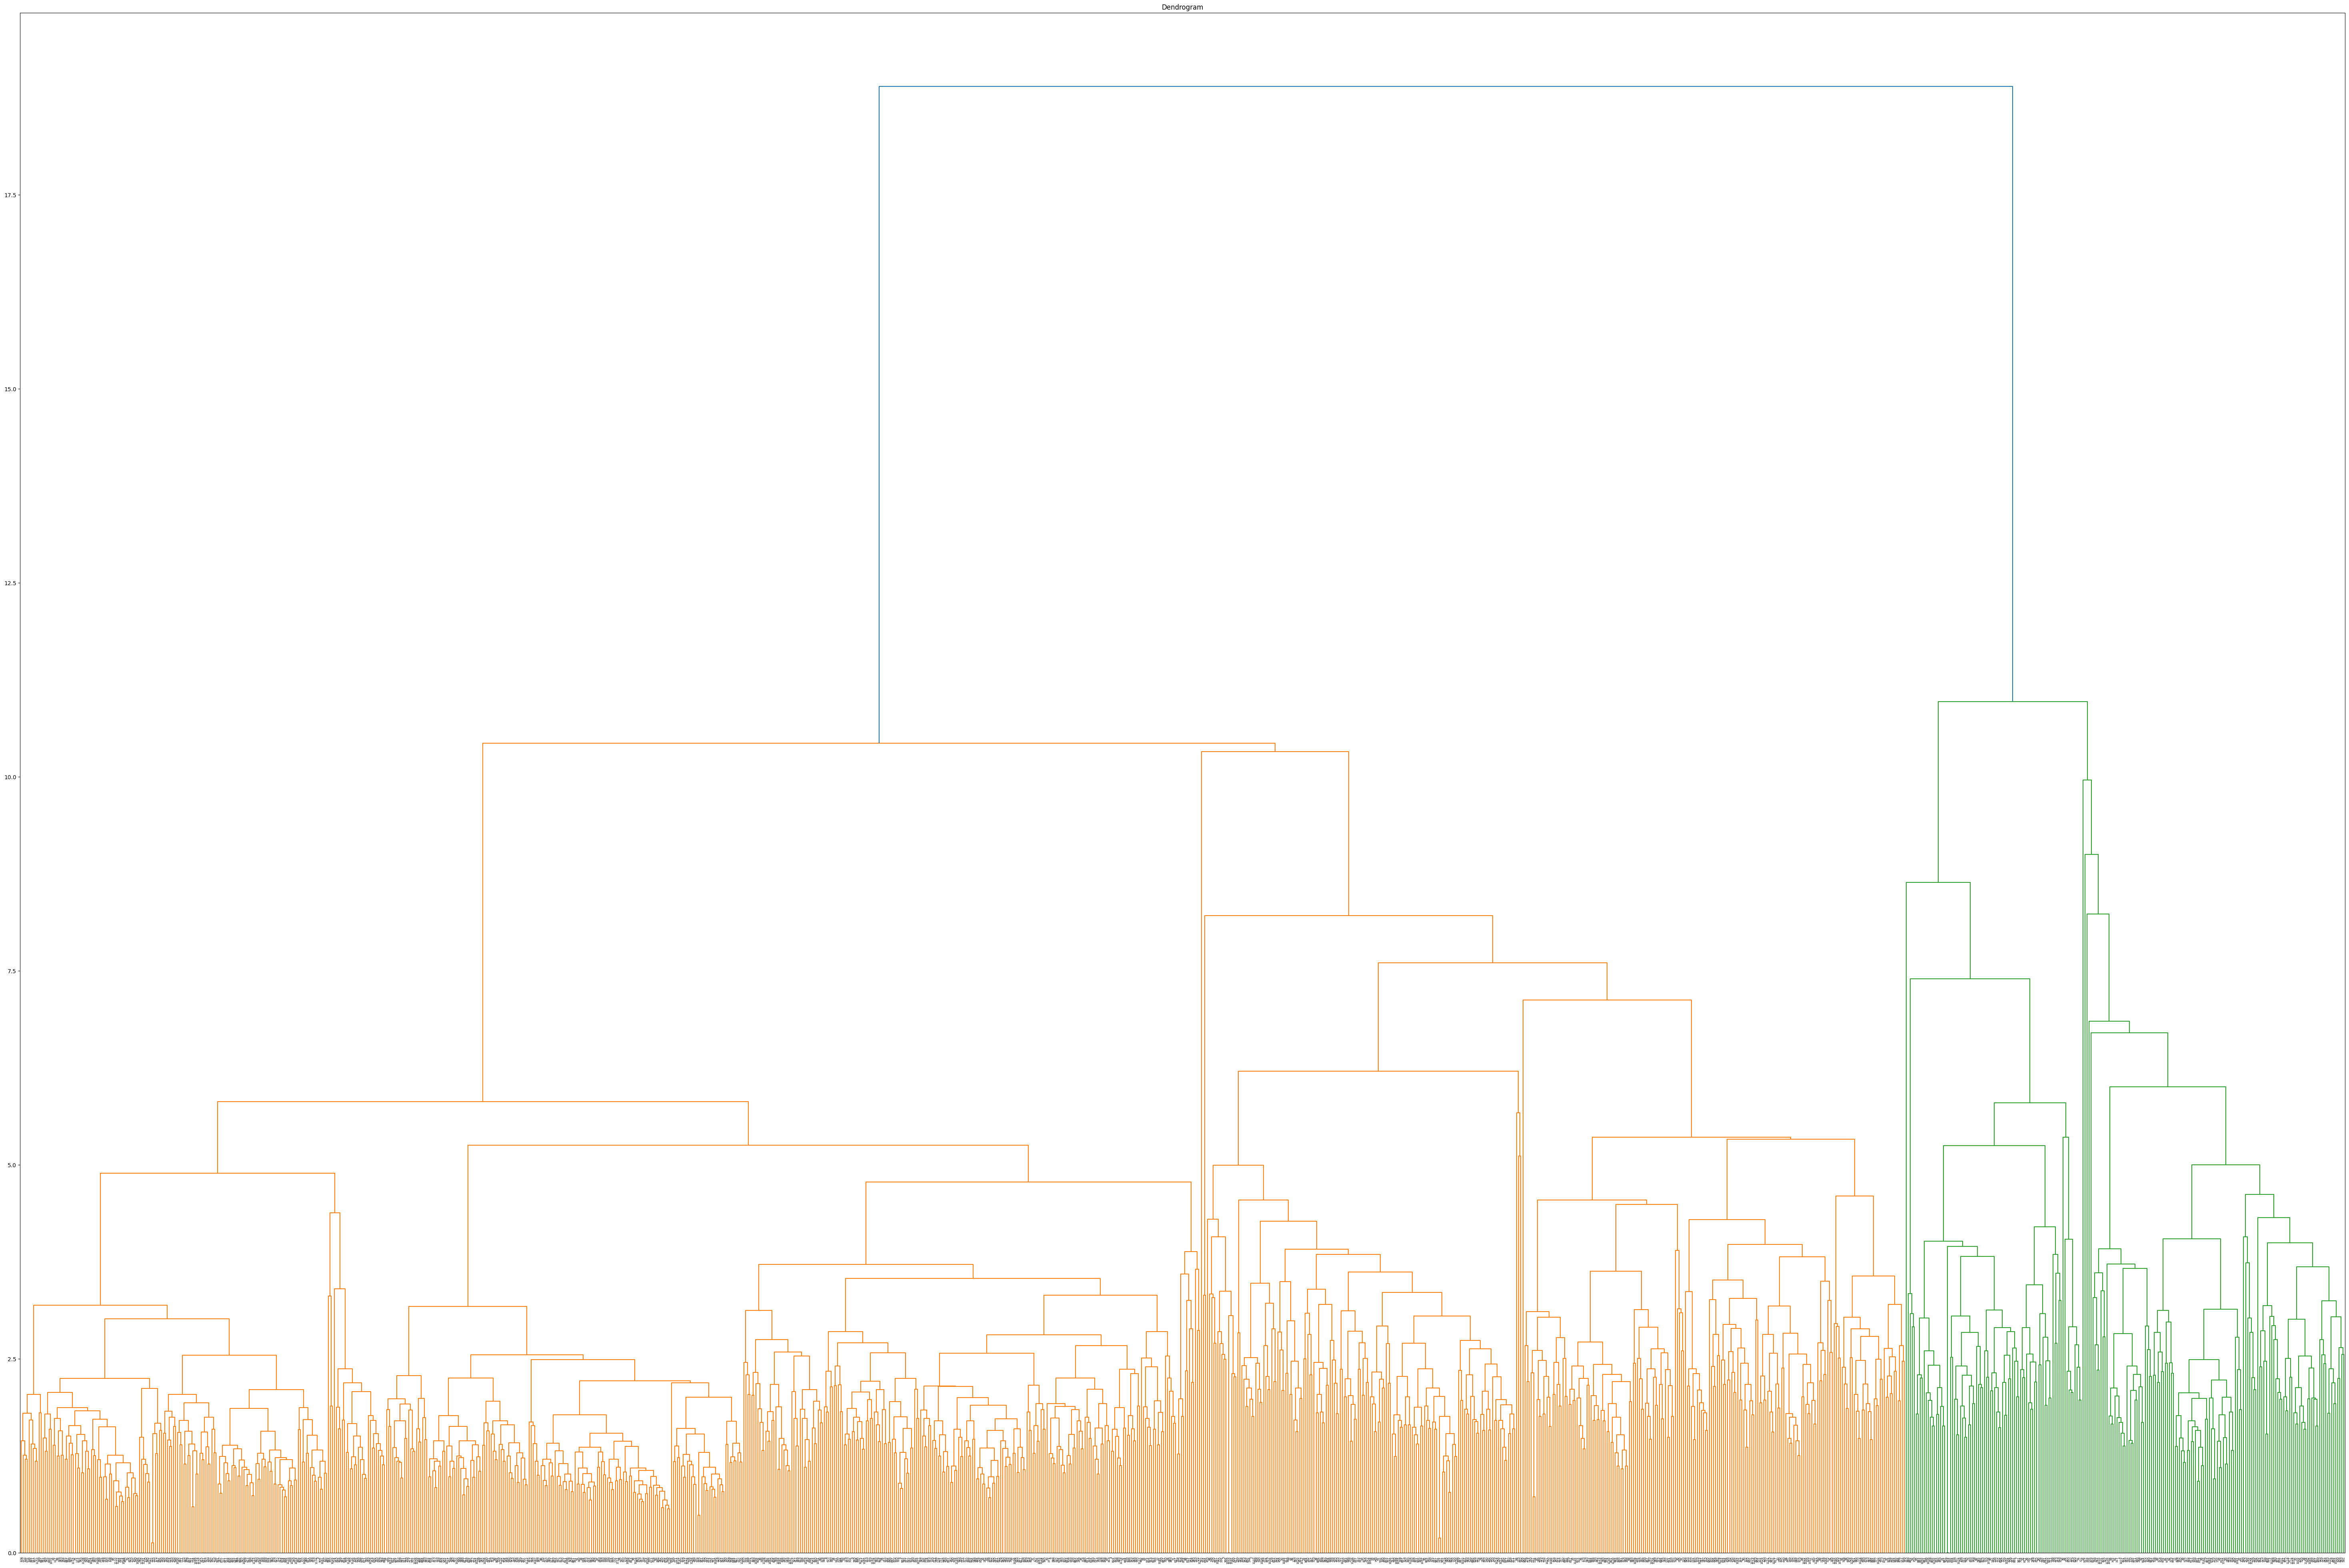

In [52]:
plt.figure(figsize=(75,50))
dendrogram(D)
plt.title("Dendrogram")

In [53]:
from scipy.cluster.hierarchy import cut_tree

In [54]:
df['clusters']  = cut_tree(D, n_clusters = 4).flatten()

In [55]:
df.head()

,StockSymbol,Industry,SubIndustry,Ret2000.01,Ret2000.02,Ret2000.03,Ret2000.04,Ret2000.05,Ret2000.06,ret2000.07,...,Ret2009.04,Ret2009.05,Ret2009.06,Ret2009.07,Ret2009.08,Ret2009.09,Ret2009.10,Ret2009.11,Ret2009.12,clusters
0,AAON,Industrial Goods,General Building Materials,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,...,0.100565,0.067762,-0.045062,-0.025832,0.060976,-0.039234,-0.101297,0.041804,0.019885,0
1,AAPL,Consumer Goods,Electronic Equipment,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,...,0.208858,0.079571,0.043673,0.138606,0.018159,0.103339,0.016995,0.053267,0.041980,1
2,ABAX,Healthcare,Diagnostic Substances,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,...,-0.119907,0.162126,0.161108,0.304581,0.001883,0.014026,-0.141783,-0.024740,0.134043,2
3,ABCB,Financial,Regional,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,...,0.402570,-0.039816,-0.020155,0.004651,0.007812,0.122449,-0.170423,0.105351,0.062315,0
4,ABFS,Services,Trucking,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,...,0.227007,0.216357,-0.075114,0.069471,0.112273,-0.052831,-0.127703,-0.047582,0.191981,0


In [56]:
df.groupby('clusters').size()

clusters
0    588
1    131
2    351
3     88
dtype: int64

In [57]:
df[df['clusters'] == 0].groupby('Industry').size().sort_values(ascending=False)

Industry
Financial            299
Services             113
Consumer Goods        54
Technology            38
Healthcare            29
Industrial Goods      23
Basic Materials       17
Utilities             11
Conglomerates          2
Consumer Cyclical      2
dtype: int64

In [58]:
df[df['clusters'] == 0].groupby('SubIndustry').size().sort_values(ascending=False)

SubIndustry
Regional                          196
Savings & Loans                    51
Property & Casualty Insurance      16
Restaurants                        11
Trucking                           11
                                 ... 
Movie Production, Theaters          1
Oil & Gas Equipment & Services      1
Oil & Gas Pipelines                 1
Paper & Paper Products              1
Wireless Communications             1
Length: 125, dtype: int64

In [59]:
df[df['clusters'] == 1].groupby('Industry').size().sort_values(ascending=False)

Industry
Technology          104
Services             11
Financial             5
Healthcare            5
Industrial Goods      3
Basic Materials       2
Consumer Goods        1
dtype: int64

In [60]:
df[df['clusters'] == 1].groupby('SubIndustry').size().sort_values(ascending=False)

SubIndustry
Semiconductor                          33
Semiconductor Equipment & Materials    14
Business Software & Services            8
Communication Equipment                 8
Scientific & Technical Instruments      7
Computer Peripherals                    7
Application Software                    6
Semiconductor- Memory Chips             4
Investment Brokerage                    3
Diversified Electronics                 2
Medical Appliances & Equipment          2
Security Software & Services            2
Specialty Retail, Other                 2
Data Storage Devices                    2
Technical & System Software             2
Computer Based Systems                  2
CATV Systems                            2
Business Services                       2
Networking & Communication Devices      2
Money Center Banks                      1
Steel & Iron                            1
Waste Management                        1
Research Services                       1
Printed Circuit Boards

In [61]:
df[df['clusters'] == 2].groupby('Industry').size().sort_values(ascending=False)

Industry
Technology          101
Services             73
Healthcare           49
Industrial Goods     38
Financial            34
Basic Materials      31
Consumer Goods       24
Utilities             1
dtype: int64

In [84]:
df[df['clusters'] == 2].groupby('SubIndustry').size().sort_values(ascending=False)

SubIndustry
Application Software                  16
Independent Oil & Gas                 13
Biotechnology                         13
Scientific & Technical Instruments    12
Business Services                     11
                                      ..
Medical Equipment Wholesale            1
Medical Practitioners                  1
Movie Production, Theaters             1
Music & Video Stores                   1
Life Insurance                         1
Length: 106, dtype: int64

In [63]:
df[df['clusters'] == 3].groupby('Industry').size().sort_values(ascending=False)

Industry
Technology          53
Healthcare          28
Services             5
Consumer Goods       1
Industrial Goods     1
dtype: int64

In [64]:
df[df['clusters'] == 3].groupby('SubIndustry').size().sort_values(ascending=False)

SubIndustry
Biotechnology                          17
Application Software                    6
Communication Equipment                 6
Networking & Communication Devices      5
Semiconductor Equipment & Materials     5
Semiconductor                           5
Medical Instruments & Supplies          4
Diversified Electronics                 3
Multimedia & Graphics Software          3
Internet Software & Services            3
Computer Peripherals                    2
Data Storage Devices                    2
Drug Manufacturers                      2
Research Services                       2
Business Software & Services            2
Semiconductor- Memory Chips             1
Technical & System Software             1
Security Software & Services            1
Scientific & Technical Instruments      1
Processing Systems & Products           1
Printed Circuit Boards                  1
Medical Laboratories & Research         1
Information Technology Services         1
Medical Appliances & E

In [65]:
df.groupby('clusters')[['Ret2000.02','Ret2000.03']].mean()

,Ret2000.02,Ret2000.03
clusters,,
0,-0.023660,0.011428
1,0.197151,-0.052053
2,0.113993,-0.002455
3,1.038105,-0.259350


In [66]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4,random_state=42)
kmeans.fit(df_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [67]:
df['clusters_kmeans'] = kmeans.predict(df_cluster)

In [68]:
df.groupby('clusters_kmeans').size()

clusters_kmeans
0    535
1    185
2     90
3    348
dtype: int64

In [69]:
df[df['clusters_kmeans'] == 0].groupby('Industry').size().sort_values(ascending=False)

Industry
Financial            305
Services              96
Consumer Goods        39
Technology            29
Healthcare            27
Industrial Goods      17
Basic Materials       11
Utilities             10
Consumer Cyclical      1
dtype: int64

In [70]:
df[df['clusters_kmeans'] == 0].groupby('SubIndustry').size().sort_values(ascending=False)

SubIndustry
Regional                          201
Savings & Loans                    55
Property & Casualty Insurance      14
Trucking                           10
Restaurants                         9
                                 ... 
Pollution & Treatment Controls      1
Printed Circuit Boards              1
Drugs                               1
Independent Oil & Gas               1
Wireless Communications             1
Length: 112, dtype: int64

In [71]:
df[df['clusters_kmeans'] == 1].groupby('Industry').size().sort_values(ascending=False)

Industry
Technology          143
Services             19
Healthcare           10
Financial             7
Industrial Goods      3
Consumer Goods        2
Basic Materials       1
dtype: int64

In [72]:
df[df['clusters_kmeans'] == 1].groupby('SubIndustry').size().sort_values(ascending=False)

SubIndustry
Semiconductor                          36
Application Software                   15
Semiconductor Equipment & Materials    14
Scientific & Technical Instruments     12
Business Software & Services           10
Communication Equipment                 9
Computer Peripherals                    6
Networking & Communication Devices      5
Technical & System Software             5
Investment Brokerage                    4
Semiconductor- Memory Chips             4
Diversified Electronics                 4
Electronics Wholesale                   3
Multimedia & Graphics Software          3
Wireless Communications                 3
Research Services                       3
Specialty Retail, Other                 3
Biotechnology                           3
Internet Software & Services            3
Printed Circuit Boards                  2
Security Software & Services            2
Medical Instruments & Supplies          2
Medical Appliances & Equipment          2
Management Services   

In [73]:
df[df['clusters_kmeans'] == 2].groupby('Industry').size().sort_values(ascending=False)

Industry
Technology          48
Healthcare          33
Services             4
Industrial Goods     2
Consumer Goods       1
Financial            1
Utilities            1
dtype: int64

In [74]:
df[df['clusters_kmeans'] == 2].groupby('SubIndustry').size().sort_values(ascending=False)

SubIndustry
Biotechnology                          23
Communication Equipment                 8
Application Software                    7
Semiconductor Equipment & Materials     5
Semiconductor                           5
Networking & Communication Devices      4
Computer Peripherals                    3
Diversified Electronics                 3
Internet Software & Services            2
Scientific & Technical Instruments      2
Research Services                       2
Medical Instruments & Supplies          2
Medical Appliances & Equipment          2
Industrial Electrical Equipment         2
Data Storage Devices                    2
Diagnostic Substances                   2
Drug Manufacturers                      1
Drugs                                   1
Semiconductor- Memory Chips             1
Business Software & Services            1
Catalog & Mail Order Houses             1
Security Software & Services            1
Processing Systems & Products           1
Diversified Communicat

In [75]:
df[df['clusters_kmeans'] == 3].groupby('Industry').size().sort_values(ascending=False)

Industry
Services             83
Technology           76
Industrial Goods     43
Healthcare           41
Basic Materials      38
Consumer Goods       38
Financial            25
Conglomerates         2
Consumer Cyclical     1
Utilities             1
dtype: int64

In [76]:
df[df['clusters_kmeans'] == 3].groupby('SubIndustry').size().sort_values(ascending=False)

SubIndustry
Independent Oil & Gas                13
Business Services                    11
Diversified Machinery                10
Information Technology Services       9
Restaurants                           9
                                     ..
Medical Practitioners                 1
Movie Production, Theaters            1
Music & Video Stores                  1
Photographic Equipment & Supplies     1
Wireless Communications               1
Length: 113, dtype: int64

# Insights

i) It is valid not to normalize data because the values are all in percentages which means they are in the same scale.

ii) Initially, I chose 11 clusters since the cluster separation was reasonably clear at a lower vertical line height according to the dendrogram. Even 6 clusters might be a reasonable choice just based on the dendrogram.

However, all clusters except 4 had just one or two datapoints and unbalanced cluster sizes are not ideal to draw useful insights. Hence, I chose 4 clusters even though the vertical line height is higher in the dendrogram for that number.

iii) First cluster has 588 stocks, Second has 131, third has 351 and fourth has 88 stocks.

First cluster predominantly consists of stocks in the Financial Industry with Regional and Savings and loan being the top sub-industries.

Second cluster predominantly consists of stocks in the Technology Industry with Semiconductor being the top sub-industry.

Third cluster predominantly consists of stocks in the Technology Industry with Services Industry having a significant presence as well. Application software is the most featured sub-industry with Business services and Independent oil and gas not far behind.

Fourth cluster predominantly consists of stocks in the Technology and Healthcare Industry with Biotechnology being the most featured sub-industry.

iv) For Feb 2000, the first cluster has negative average return. Whereas for March 2000, second, third, and fourth clusters have a negative average return.

v) The clusters in k-means and hierarchical clustering are more or less similar with some distinctions. The make up of fourth cluster in hierarchical is similar to the third cluster in k-means whereas there are minor difference between third cluster of hierarchical and fourth cluster in k-means. The top industry is Technology followed by Services in the third cluster of hierarchical clustering, whereas it is Services followed by Technology in the fourth cluster of k-means.

# Section C

In [85]:
print("First cluster average return over the complete period: ",df.iloc[:,:-2][df['clusters'] == 0].mean().mean())
print("Second cluster average return over the complete period: ",df.iloc[:,:-2][df['clusters'] == 1].mean().mean())
print("Third cluster average return over the complete period: ",df.iloc[:,:-2][df['clusters'] == 2].mean().mean())
print("Fourth cluster average return over the complete period: ",df.iloc[:,:-2][df['clusters'] == 3].mean().mean())

First cluster average return over the complete period:  0.006143887716354874
Second cluster average return over the complete period:  0.010419559001717555
Third cluster average return over the complete period:  0.015526939383760688
Fourth cluster average return over the complete period:  0.01629513526145833


<ipython-input-85-9c8d43bb94c4>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("First cluster average return over the complete period: ",df.iloc[:,:-2][df['clusters'] == 0].mean().mean())
<ipython-input-85-9c8d43bb94c4>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Second cluster average return over the complete period: ",df.iloc[:,:-2][df['clusters'] == 1].mean().mean())
<ipython-input-85-9c8d43bb94c4>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it wi

In [86]:
print("First cluster (K-means) average return over the complete period: ",df.iloc[:,:-2][df['clusters_kmeans'] == 0].mean().mean())
print("Second cluster (K-means) average return over the complete period: ",df.iloc[:,:-2][df['clusters_kmeans'] == 1].mean().mean())
print("Third cluster (K-means) average return over the complete period: ",df.iloc[:,:-2][df['clusters_kmeans'] == 2].mean().mean())
print("Fourth cluster (K-means) average return over the complete period: ",df.iloc[:,:-2][df['clusters_kmeans'] == 3].mean().mean())

First cluster (K-means) average return over the complete period:  0.0051172777020560755
Second cluster (K-means) average return over the complete period:  0.009163261705090091
Third cluster (K-means) average return over the complete period:  0.017829954985277775
Fourth cluster (K-means) average return over the complete period:  0.016735209478256706


<ipython-input-86-049997a75a06>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("First cluster (K-means) average return over the complete period: ",df.iloc[:,:-2][df['clusters_kmeans'] == 0].mean().mean())
<ipython-input-86-049997a75a06>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Second cluster (K-means) average return over the complete period: ",df.iloc[:,:-2][df['clusters_kmeans'] == 1].mean().mean())
<ipython-input-86-049997a75a06>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is depr

In [79]:
variations_1 = df.iloc[:,3:-2][df['clusters'] == 0].diff(axis=1).abs()
average_variation_1 = variations_1.mean(axis=0).mean()

variations_2 = df.iloc[:,3:-2][df['clusters'] == 1].diff(axis=1).abs()
average_variation_2 = variations_2.mean(axis=0).mean()

variations_3 = df.iloc[:,3:-2][df['clusters'] == 2].diff(axis=1).abs()
average_variation_3 = variations_3.mean(axis=0).mean()

variations_4 = df.iloc[:,3:-2][df['clusters'] == 3].diff(axis=1).abs()
average_variation_4 = variations_4.mean(axis=0).mean()

In [80]:
print("Average Variation of cluster 1:",average_variation_1)
print("Average Variation of cluster 2:",average_variation_2)
print("Average Variation of cluster 3:",average_variation_3)
print("Average Variation of cluster 4:",average_variation_4)

Average Variation of cluster 1: 0.10752413829278856
Average Variation of cluster 2: 0.1982591615206235
Average Variation of cluster 3: 0.17125948595795923
Average Variation of cluster 4: 0.21122167823185636


In [82]:
variations_k1 = df.iloc[:,3:-2][df['clusters_kmeans'] == 0].diff(axis=1).abs()
average_variation_k1 = variations_k1.mean(axis=0).mean()

variations_k2 = df.iloc[:,3:-2][df['clusters_kmeans'] == 1].diff(axis=1).abs()
average_variation_k2 = variations_k2.mean(axis=0).mean()

variations_k3 = df.iloc[:,3:-2][df['clusters_kmeans'] == 2].diff(axis=1).abs()
average_variation_k3 = variations_k3.mean(axis=0).mean()

variations_k4 = df.iloc[:,3:-2][df['clusters_kmeans'] == 3].diff(axis=1).abs()
average_variation_k4 = variations_k4.mean(axis=0).mean()

In [83]:
print("Average Variation of cluster 1 (k-means):",average_variation_k1)
print("Average Variation of cluster 2 (k-means):",average_variation_k2)
print("Average Variation of cluster 3 (k-means):",average_variation_k3)
print("Average Variation of cluster 4 (k-means):",average_variation_k4)

Average Variation of cluster 1 (k-means): 0.10437619404555092
Average Variation of cluster 2 (k-means): 0.1906114879034749
Average Variation of cluster 3 (k-means): 0.21572261093650794
Average Variation of cluster 4 (k-means): 0.16487444445462665


# Insights

While diversifying stocks one should also consider the risk profile of the target audience.

Audience with higher risk profile might be better off prioritizing more stocks from cluster 3 of k-means first since it has the highest average return over the complete period even though it has the highest average variation (indicating high volatility) among all clusters. k-means cluster also has a slightly better average return than its hierarchical cluster counterpart

Audience with lower risk profile might be better off prioritizing more stocks from cluster 4 of k-means first since the average variation is lower than cluster 3 but the average return is still very close to cluster 3. k-means cluster has a slightly better average return than its hierarchical cluster counterpart

Therefore, if we are diversifying portfolio across clusters, stocks with best average returns can be considered from each cluster with the following split. For higher risk profile, 40% of stocks can be from cluster 3 (k-means), 30% from cluster 4 (k-means), 20% from cluster 2 (hierarchical since better average return) and 10% from cluster 1 (hierarchical again due to better average return).

For lower risk profile, 40% of stocks can be from cluster 4 (k-means), 30% from cluster 3 (k-means), 20% from cluster 2 (hierarchical since better average return) and 10% from cluster 1 (hierarchical again due to better average return).